In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 그래프에 한글 설정
plt.rcParams['font.family']='Malgun Gothic'

# 그래프에 마이너스 기호 깨지는 문제 해결
plt.rcParams['axes.unicode_minus'] = False

df_order1 = pd.read_excel (r'3.1 주문정보(개인정보 제외)_추출.xlsx')
df_payment1 = pd.read_excel (r'4.1 결제정보(개인정보 제외)_추출.xlsx')


# 주문 정보와 결제 정보
- 주문 건수 : 24766
- 주문번호 : 진행구분 순번

In [7]:
# 주문 정보
df_order1.head()

,주문번호,순번,주문일시,진행구분,배송지,상품번호,상품명,옵션명,수량,판매가,배송비,쿠폰할인액,회원주문여부,회원번호
0,1711080845542139,1,2017-11-08 08:46:26,환불완료,서울 영등포구 국제금융로2길 32,G1710311847_6746,(임직원 전용)[케라미카] 바뎀 2인홈세트 (11p),NaN,1,48840.0,0.0,9760.0,Y,1876
1,1711080902432145,1,2017-11-08 09:04:28,결제취소,서울 영등포구 국제금융로2길 32,G1710311849_6973,(임직원 전용)[아름다운공간] 스윗도자기 원형디스펜서 (2color/400ml),색상:핑크,1,7800.0,2500.0,1560.0,Y,1876
2,1711080932562165,1,2017-11-08 09:33:20,결제취소,서울 영등포구 국제금융로2길 32,G1710311843_6700,(임직원 전용)[런드레스] 울 캐시미어 스프레이 세다 cedar (4 fl.oz),NaN,1,16200.0,0.0,3240.0,Y,1882
3,1711080934572167,1,2017-11-08 09:35:19,환불완료,서울 영등포구 국제금융로2길 32,G1710311906_7061,(임직원 전용)[트레비앙] 전동 와인 오프너_DM-503,NaN,1,35040.0,3000.0,7000.0,Y,1882
4,1711080944432170,1,2017-11-08 09:45:08,결제취소,서울 영등포구 국제금융로2길 32,G1710311843_6698,(임직원 전용)[런드레스] 패브릭 프레쉬 베이비 Baby (4 fl.oz.),NaN,1,16200.0,0.0,3240.0,Y,1882


In [8]:
df_order1.shape

(24766, 14)

In [9]:
df_order1.회원주문여부.unique()

array(['Y', 'N'], dtype=object)

In [10]:
df_order1.진행구분.value_counts()

구매확정     19161
결제취소      2583
주문취소      1215
배송완료       824
배송중        473
환불완료       244
결제완료        93
배송준비중       87
교환완료        59
환불신청        12
주문완료        11
교환신청         4
Name: 진행구분, dtype: int64

In [11]:
df_order1.주문번호.nunique()

19903

In [12]:
df_order1.주문번호.value_counts()

1809141324447994    39
1810231601243192    34
1810221328582608    18
1807171739294788    16
1809152219458494    13
                    ..
1807181419265389     1
1807181418375384     1
1807181417575382     1
1807181417045380     1
1811061628589313     1
Name: 주문번호, Length: 19903, dtype: int64

In [13]:
df_order1[df_order1['주문번호'] == 1809141324447994]['판매가'].sum()
# 한 회원의 총 판매액의 합 = 결제금액 (한 회원이 여러 종류의 상품을 구입 시 같은 주문번호)

11800000.0

In [14]:
# 1876
df_order1[df_order1['회원번호'] == 1876]

,주문번호,순번,주문일시,진행구분,배송지,상품번호,상품명,옵션명,수량,판매가,배송비,쿠폰할인액,회원주문여부,회원번호
0,1711080845542139,1,2017-11-08 08:46:26,환불완료,서울 영등포구 국제금융로2길 32,G1710311847_6746,(임직원 전용)[케라미카] 바뎀 2인홈세트 (11p),NaN,1,48840.0,0.0,9760.0,Y,1876
1,1711080902432145,1,2017-11-08 09:04:28,결제취소,서울 영등포구 국제금융로2길 32,G1710311849_6973,(임직원 전용)[아름다운공간] 스윗도자기 원형디스펜서 (2color/400ml),색상:핑크,1,7800.0,2500.0,1560.0,Y,1876
296,1711290902044073,1,2017-11-29 09:02:43,결제취소,서울 영등포구 국제금융로2길 32,G1710271341_5922,[프리쉐] 휴대용 UV LED 칫솔살균기 PA-TS700,칼라:레드,1,9000.0,3000.0,1800.0,Y,1876
468,1712130935405140,1,2017-12-13 09:37:03,구매확정,서울 영등포구 국제금융로2길 32,G1710271341_5922,[프리쉐] 휴대용 UV LED 칫솔살균기 PA-TS700,칼라:레드,1,9000.0,3000.0,1800.0,Y,1876
778,1711080902432145,2,2017-11-08 09:04:28,결제취소,서울 영등포구 국제금융로2길 32,G1710311849_6973,(임직원 전용)[아름다운공간] 스윗도자기 원형디스펜서 (2color/400ml),색상:스카이블루,1,7800.0,0.0,1560.0,Y,1876
1001,1712130935405140,2,2017-12-13 09:37:03,구매확정,서울 영등포구 국제금융로2길 32,G1710271341_5922,[프리쉐] 휴대용 UV LED 칫솔살균기 PA-TS700,칼라:블루,1,9000.0,0.0,1800.0,Y,1876
1296,1802021823248423,1,2018-02-02 18:25:59,구매확정,서울 종로구 경교장길 35,G1801261029_7433,(임직원전용)(쿠폰제외)[정관장]홍삼 비력50ml x 30포,NaN,1,40500.0,0.0,0.0,Y,1876
1298,1802021830028428,1,2018-02-02 18:31:39,구매확정,서울 동작구 상도로41길 28,G1801261029_7433,(임직원전용)(쿠폰제외)[정관장]홍삼 비력50ml x 30포,NaN,1,40500.0,0.0,0.0,Y,1876
1322,1802051553558599,1,2018-02-05 15:57:47,결제취소,서울 강남구 광평로34길 35,G1710281523_6234,(임직원 전용)[메디니스] 닥터아큐 핸드마사지기,NaN,1,105600.0,0.0,0.0,Y,1876
1323,1802051558598600,1,2018-02-05 16:01:05,결제취소,서울 강남구 광평로34길 35,G1710281523_6234,(임직원 전용)[메디니스] 닥터아큐 핸드마사지기,NaN,1,105600.0,0.0,0.0,Y,1876


In [15]:
df_order1[df_order1['주문번호'] == 1809141324447994]

,주문번호,순번,주문일시,진행구분,배송지,상품번호,상품명,옵션명,수량,판매가,배송비,쿠폰할인액,회원주문여부,회원번호
16900,1809141324447994,1,2018-09-14 13:29:27,구매확정,서울 영등포구 국제금융로2길 32,G1809101334_1806,(추석선물)[경주천년한우] 1+등급 실속A세트 (꽃등심300g+불고기300g+국거리...,NaN,3,300000.0,0.0,0.0,Y,49833
17271,1809141324447994,2,2018-09-14 13:29:27,구매확정,서울 영등포구 국제금융로2길 32,G1809101052_1727,(추석선물)[쿠비녹스] 디지털 에어프라이어 CX-174DF+다용도 파워 믹서기 CX...,NaN,15,1500000.0,0.0,0.0,Y,49833
17272,1809141324447994,3,2018-09-14 13:29:27,구매확정,서울 영등포구 국제금융로2길 32,G1809101330_1802,"(추석선물)[SESA] 세사 까뮤 VIP 기능성 차렵이불(D) 3종세트(차렵이불, ...",NaN,11,1100000.0,0.0,0.0,Y,49833
17273,1809141324447994,4,2018-09-14 13:29:27,구매확정,서울 영등포구 국제금융로2길 32,G1809101109_1739,(추석선물)[쿠비녹스] 스마트 초고속 블랜더 CX171-HB,NaN,7,700000.0,0.0,0.0,Y,49833
17274,1809141324447994,5,2018-09-14 13:29:27,구매확정,서울 영등포구 국제금융로2길 32,G1809101327_1800,(추석선물)[팡가오] 무선 눈 마사지기 PG-2404C3+저주파 목 안마기 PG-2...,NaN,2,200000.0,0.0,0.0,Y,49833
17275,1809141324447994,6,2018-09-14 13:29:27,구매확정,서울 영등포구 국제금융로2길 32,G1809101325_1797,(추석선물)[아쿠아픽] 뉴아쿠아픽 구강세정기 AQ-300+휴대용 구강세정기 코드리스...,NaN,2,200000.0,0.0,0.0,Y,49833
17276,1809141324447994,7,2018-09-14 13:29:27,구매확정,서울 영등포구 국제금융로2길 32,G1809101108_1738,(추석선물)[팡가오] 프리미엄 머리 마사지기 PG-3000,NaN,1,100000.0,0.0,0.0,Y,49833
17277,1809141324447994,8,2018-09-14 13:29:27,구매확정,서울 영등포구 국제금융로2길 32,G1809101105_1737,(추석선물)[센스맘] 9-ZONE 에어매트리스 프리미엄 12cm 퀸세트,NaN,1,100000.0,0.0,0.0,Y,49833
17278,1809141324447994,9,2018-09-14 13:29:27,구매확정,서울 영등포구 국제금융로2길 32,G1809101100_1733,(추석선물)[다찌] 테이블 그릴 풀세트,색상:시크블랙,5,500000.0,0.0,0.0,Y,49833
17279,1809141324447994,10,2018-09-14 13:29:27,구매확정,서울 영등포구 국제금융로2길 32,G1809101333_1805,"(추석선물)[삼천리자전거] 2018년형 26 라빈 21 MTB형 자전거(블랙, 화이트)",색상:블랙,4,400000.0,0.0,0.0,Y,49833


In [16]:
df_payment1[df_payment1['주문번호'] == 1809141324447994]

,주문번호,결제번호,결제일시,진행구분명,결제수단,결제금액,카드사,할부개월
11272,1809141324447994,22165,2018-09-14 13:29:27,완료,신용카드,11800000.0,BC카드,0.0


In [17]:
df_payment1[df_payment1['주문번호'] == 1711080845542139]
# 주문 번호가 여러 개일 경우, 결제정보에는 한 개의 주문번호로 주문의 합계 금액이 결제액

,주문번호,결제번호,결제일시,진행구분명,결제수단,결제금액,카드사,할부개월


In [2]:
# 결제 정보
df_payment1.head()

,주문번호,결제번호,결제일시,진행구분명,결제수단,결제금액,카드사,할부개월
0,1709061018150051,18,2017-09-06 10:19:59,완료,신용카드,10500.0,삼성카드,0.0
1,1709111530200146,46,2017-09-11 15:32:42,완료,신용카드,27500.0,삼성카드,0.0
2,1709241514300410,161,2017-09-24 15:24:39,완료,가상계좌,30500.0,NaN,NaN
3,1709261646470481,210,2017-09-26 17:05:03,완료,신용카드,0.0,삼성카드,0.0
4,1709262044350511,233,2017-09-26 20:55:24,완료,신용카드,7500.0,신한카드,0.0


In [3]:
df_payment1 [ df_payment1['주문번호'] == 1809141544518151 ]

,주문번호,결제번호,결제일시,진행구분명,결제수단,결제금액,카드사,할부개월
11301,1809141544518151,22220,2018-09-14 15:46:00,완료,신용카드,51260.0,하나SK카드,0.0


In [4]:
51260 - 64080

-12820

In [19]:
df_payment1.shape

(25499, 8)

In [19]:
df_payment1['주문번호'].nunique()

16672

In [42]:
# 전체 결제 건수 : 25499
# 주문 번호(unique) : 16672
# 결제수단 2개 이상 : 8827
25499 - 16672

8827

In [25]:
payment_double = df_payment1['주문번호'].value_counts().to_frame()
payment_double

,주문번호
1709061018150051,2
1807271005479822,2
1807270833389764,2
1807270854279779,2
1807270859119783,2
...,...
1808032042041425,1
1808032310481433,1
1808040642501443,1
1808040912591448,1


In [30]:
payment_double[payment_double['주문번호'] >= 2]

,주문번호
1709061018150051,2
1807271005479822,2
1807270833389764,2
1807270854279779,2
1807270859119783,2
...,...
1806201138056431,2
1806201018366388,2
1810211323422178,2
1806191701346282,2


In [22]:
df_payment1[df_payment1['주문번호'] == 1709061018150051]

,주문번호,결제번호,결제일시,진행구분명,결제수단,결제금액,카드사,할부개월
0,1709061018150051,18,2017-09-06 10:19:59,완료,신용카드,10500.0,삼성카드,0.0
16590,1709061018150051,19,2017-09-06 10:19:58,완료,적립금,3000.0,NaN,NaN


In [36]:
df_payment1['결제수단'].unique()

array(['신용카드', '가상계좌', '실시간계좌이체', '휴대폰결제', 'PAYCO', '무통장', '적립금'],
      dtype=object)

In [39]:
df_payment1['결제수단'].value_counts().to_frame()

,결제수단
신용카드,12109
적립금,8902
가상계좌,1658
PAYCO,1511
휴대폰결제,1018
실시간계좌이체,291
무통장,10


In [40]:
# 적립금 8902 건
# 전체 결제 건수 25499
25499 - 8902

16597

In [43]:
16672 - 16597

75

In [20]:
df_payment1.shape

(25499, 8)

In [37]:
df_payment1[df_payment1['주문번호'] == 1807270854279779]

,주문번호,결제번호,결제일시,진행구분명,결제수단,결제금액,카드사,할부개월
7041,1807270854279779,14718,2018-07-27 08:56:10,완료,신용카드,36200.0,신한카드,0.0
20346,1807270854279779,14719,2018-07-27 08:56:10,완료,적립금,3000.0,NaN,NaN


In [9]:
24766 - 25499

-733

# 주문 일시와 판매가
- 주분 구분에서 4가지 값(환불완료, 결제취소, 주문취소, 환불신청)은 제외

In [47]:
df_order1.head()

,주문번호,순번,주문일시,진행구분,배송지,상품번호,상품명,옵션명,수량,판매가,배송비,쿠폰할인액,회원주문여부,회원번호
0,1711080845542139,1,2017-11-08 08:46:26,환불완료,서울 영등포구 국제금융로2길 32,G1710311847_6746,(임직원 전용)[케라미카] 바뎀 2인홈세트 (11p),NaN,1,48840.0,0.0,9760.0,Y,1876
1,1711080902432145,1,2017-11-08 09:04:28,결제취소,서울 영등포구 국제금융로2길 32,G1710311849_6973,(임직원 전용)[아름다운공간] 스윗도자기 원형디스펜서 (2color/400ml),색상:핑크,1,7800.0,2500.0,1560.0,Y,1876
2,1711080932562165,1,2017-11-08 09:33:20,결제취소,서울 영등포구 국제금융로2길 32,G1710311843_6700,(임직원 전용)[런드레스] 울 캐시미어 스프레이 세다 cedar (4 fl.oz),NaN,1,16200.0,0.0,3240.0,Y,1882
3,1711080934572167,1,2017-11-08 09:35:19,환불완료,서울 영등포구 국제금융로2길 32,G1710311906_7061,(임직원 전용)[트레비앙] 전동 와인 오프너_DM-503,NaN,1,35040.0,3000.0,7000.0,Y,1882
4,1711080944432170,1,2017-11-08 09:45:08,결제취소,서울 영등포구 국제금융로2길 32,G1710311843_6698,(임직원 전용)[런드레스] 패브릭 프레쉬 베이비 Baby (4 fl.oz.),NaN,1,16200.0,0.0,3240.0,Y,1882


In [49]:
df_order1.dtypes

주문번호        int64
순번          int64
주문일시       object
진행구분       object
배송지        object
상품번호       object
상품명        object
옵션명        object
수량          int64
판매가       float64
배송비       float64
쿠폰할인액     float64
회원주문여부     object
회원번호        int64
dtype: object

In [51]:
# datetime형으로 변경 : 주문일시
df_order1['주문일시'] = pd.to_datetime(df_order1['주문일시'])

In [54]:
df_order1['주문일자'] = df_order1['주문일시'].dt.date

In [55]:
df_order1.head()

,주문번호,순번,주문일시,진행구분,배송지,상품번호,상품명,옵션명,수량,판매가,배송비,쿠폰할인액,회원주문여부,회원번호,주문일자
0,1711080845542139,1,2017-11-08 08:46:26,환불완료,서울 영등포구 국제금융로2길 32,G1710311847_6746,(임직원 전용)[케라미카] 바뎀 2인홈세트 (11p),NaN,1,48840.0,0.0,9760.0,Y,1876,2017-11-08
1,1711080902432145,1,2017-11-08 09:04:28,결제취소,서울 영등포구 국제금융로2길 32,G1710311849_6973,(임직원 전용)[아름다운공간] 스윗도자기 원형디스펜서 (2color/400ml),색상:핑크,1,7800.0,2500.0,1560.0,Y,1876,2017-11-08
2,1711080932562165,1,2017-11-08 09:33:20,결제취소,서울 영등포구 국제금융로2길 32,G1710311843_6700,(임직원 전용)[런드레스] 울 캐시미어 스프레이 세다 cedar (4 fl.oz),NaN,1,16200.0,0.0,3240.0,Y,1882,2017-11-08
3,1711080934572167,1,2017-11-08 09:35:19,환불완료,서울 영등포구 국제금융로2길 32,G1710311906_7061,(임직원 전용)[트레비앙] 전동 와인 오프너_DM-503,NaN,1,35040.0,3000.0,7000.0,Y,1882,2017-11-08
4,1711080944432170,1,2017-11-08 09:45:08,결제취소,서울 영등포구 국제금융로2길 32,G1710311843_6698,(임직원 전용)[런드레스] 패브릭 프레쉬 베이비 Baby (4 fl.oz.),NaN,1,16200.0,0.0,3240.0,Y,1882,2017-11-08


In [58]:
# 주분 구분 제외 항목(환불완료, 결제취소, 주문취소, 환불신청)
df_order1.drop(df_order1[df_order1["진행구분"] == '환불완료'].index, inplace=True)
df_order1.drop(df_order1[df_order1["진행구분"] == '결제취소'].index, inplace=True)
df_order1.drop(df_order1[df_order1["진행구분"] == '환불신청'].index, inplace=True)
df_order1.drop(df_order1[df_order1["진행구분"] == '주문취소'].index, inplace=True) 

In [6]:
df_order1.shape

(24766, 14)

In [60]:
# 주문일시 별 주문 건수 추출
df_order1_count = df_order1.groupby('주문일자').주문일시.count().to_frame()
df_order1_count

,주문일시
주문일자,
2017-11-09,3
2017-11-10,1
2017-11-11,43
2017-11-12,11
2017-11-13,59
...,...
2018-11-03,58
2018-11-04,61
2018-11-05,138


In [63]:
# 주문일자별 주문건수 시각화
df_order1_count.columns = ['주문건수']
df_order1_count

,주문건수
주문일자,
2017-11-09,3
2017-11-10,1
2017-11-11,43
2017-11-12,11
2017-11-13,59
...,...
2018-11-03,58
2018-11-04,61
2018-11-05,138


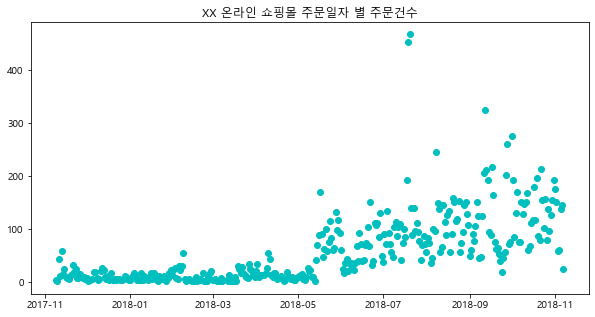

In [72]:
plt.rcParams['figure.figsize']=(10,5)

plt.scatter(df_order1_count.index, df_order1_count.values, marker = 'o', color = 'c')
plt.title('XX 온라인 쇼핑몰 주문일자 별 주문건수')
plt.show()

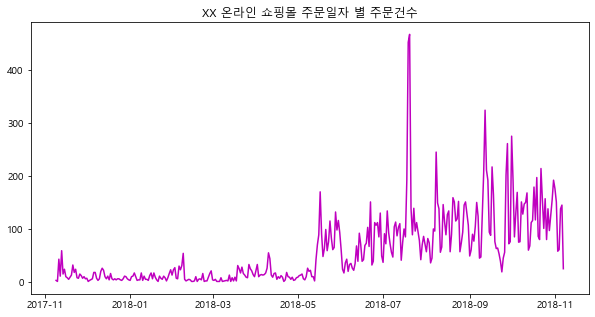

In [73]:
plt.rcParams['figure.figsize']=(10,5)

plt.plot(df_order1_count.index, df_order1_count.values, color = 'm')
plt.title('XX 온라인 쇼핑몰 주문일자 별 주문건수')
plt.show()

In [82]:
df_order1['주문년도'] = df_order1['주문일시'].dt.year
df_order1

,주문번호,순번,주문일시,진행구분,배송지,상품번호,상품명,옵션명,수량,판매가,배송비,쿠폰할인액,회원주문여부,회원번호,주문일자,주문년도
12,1711091120092237,1,2017-11-09 11:23:07,구매확정,강원 춘천시 동산면 영서로 915,G1709201602_1482,[3M] 작업용 보호안경,NaN,5,16000.0,2500.0,0.0,Y,1972,2017-11-09,2017
13,1711091146582243,1,2017-11-09 11:49:04,구매확정,경기 고양시 일산서구 고양대로 633,G1710161420_3420,[씨원] 듀얼 프리미엄 3단요추의자,색상:와인,1,52900.0,0.0,0.0,Y,2005,2017-11-09,2017
14,1711091330402269,1,2017-11-09 13:33:28,구매확정,인천 연수구 송도과학로27번길 30,G1710121442_3146,[케라미카] 바뎀 도자기 시리즈 파티 세트 (8p),NaN,1,43000.0,0.0,0.0,Y,1953,2017-11-09,2017
16,1711101906332340,1,2017-11-10 19:11:26,구매확정,서울 영등포구 국제금융로2길 32,G1711011727_7485,(임직원 전용)[루나스퀘어] 루나스피어 북유럽풍 국민수유등_IoT 감성조명,NaN,1,59400.0,0.0,11880.0,Y,2495,2017-11-10,2017
17,1711110827422358,1,2017-11-11 08:33:10,구매확정,세종특별자치시 금남면 두만길 12-1,G1710161740_3520,[아름다운공간] 사각 우드벨 저소음 탁상시계,NaN,1,11690.0,2500.0,2330.0,Y,2365,2017-11-11,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24761,1811062357169433,5,2018-11-06 23:59:03,결제완료,경남 진주시 내동면 순환로 425-61,G1805311432_8296,[월플랜] 셀프도배 전문가세트_(풀바른벽지 /롤벽지 택1),종류:전문가세트(풀바른벽지편),1,28000.0,0.0,0.0,Y,57778,2018-11-06,2018
24762,1811070212309446,2,2018-11-07 02:21:54,결제완료,충북 청주시 상당구 단재로 316,G1805311443_8348,[월플랜] 풀바른실크벽지 (뮬리 트윙클화이트)_H7011-1,"종류:만능풀바른벽지,벽높이 선택:230cm",3,29700.0,0.0,4460.0,Y,54164,2018-11-07,2018
24763,1811070212309446,3,2018-11-07 02:21:54,결제완료,충북 청주시 상당구 단재로 316,G1805311729_8951,[월플랜] 정배솔,NaN,1,12000.0,0.0,1800.0,Y,54164,2018-11-07,2018
24764,1811070212309446,4,2018-11-07 02:21:54,결제완료,충북 청주시 상당구 단재로 316,G1806051452_0740,[월플랜] 풀바른합지벽지 (샤인패브릭 바이올렛)_LG54021-6,"종류:만능풀바른벽지,벽높이 선택:230cm",9,53100.0,0.0,7970.0,Y,54164,2018-11-07,2018


In [87]:
# 년도 별 주문
df_order1_2017 = df_order1 [df_order1['주문년도'] == 2017]
df_order1_2018 = df_order1 [df_order1['주문년도'] == 2018]

In [93]:
# 년도 별 주문 건수 추출
df_order1_2017_count = df_order1_2017.groupby('주문일자').주문일시.count().to_frame()
df_order1_2018_count = df_order1_2018.groupby('주문일자').주문일시.count().to_frame()

In [94]:
df_order1_2017_count.head()

,주문일시
주문일자,
2017-11-09,3
2017-11-10,1
2017-11-11,43
2017-11-12,11
2017-11-13,59


In [95]:
df_order1_2018_count

,주문일시
주문일자,
2018-01-01,3
2018-01-02,10
2018-01-03,11
2018-01-04,17
2018-01-05,10
...,...
2018-11-03,58
2018-11-04,61
2018-11-05,138


In [96]:
# 년도 별 주문건수 시각화
df_order1_2017_count.columns = ['주문건수']
df_order1_2018_count.columns = ['주문건수']

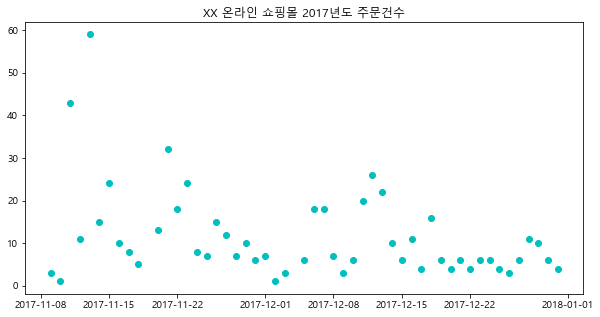

In [102]:
# 2017년도
plt.rcParams['figure.figsize']=(10,5)

plt.scatter(df_order1_2017_count.index, df_order1_2017_count.values, marker = 'o', color = 'c')
plt.title('XX 온라인 쇼핑몰 2017년도 주문건수')
plt.show()

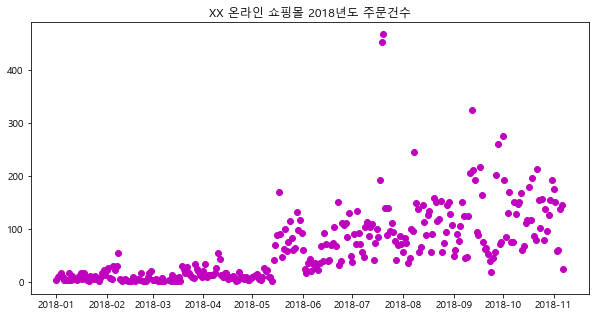

In [103]:
# 2018년도
plt.rcParams['figure.figsize']=(10,5)

plt.scatter(df_order1_2018_count.index, df_order1_2018_count.values, marker = 'o', color = 'm')
plt.title('XX 온라인 쇼핑몰 2018년도 주문건수')
plt.show()

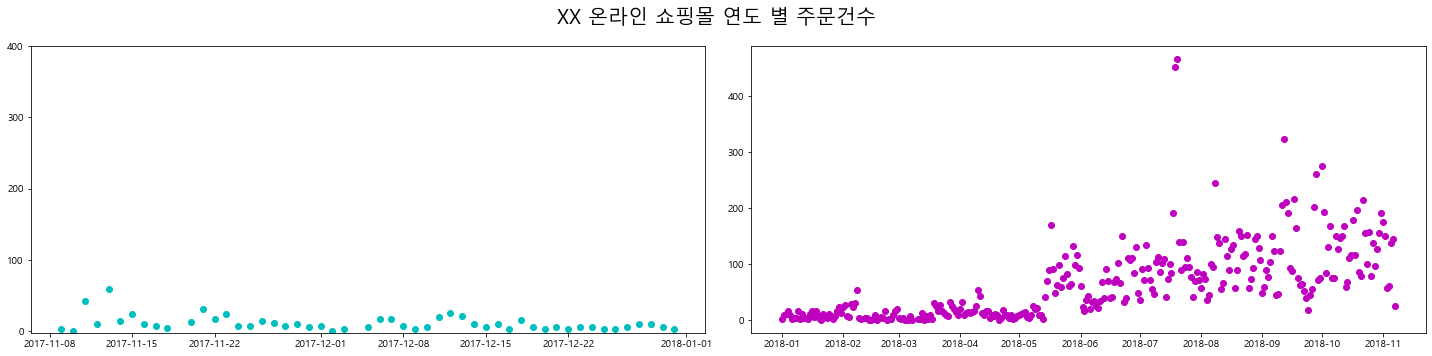

In [111]:
fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.scatter(df_order1_2017_count.index, df_order1_2017_count.values, marker = 'o', color = 'c')
ax2.scatter(df_order1_2018_count.index, df_order1_2018_count.values, marker = 'o', color = 'm')

ax1.set_yticks(range(0,500,100))
ax2.set_yticks(range(0,500,100))

fig.suptitle('XX 온라인 쇼핑몰 연도 별 주문건수', size=20)
fig.tight_layout()

plt.show()